In [171]:
# for data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


[*********************100%%**********************]  1 of 1 completed


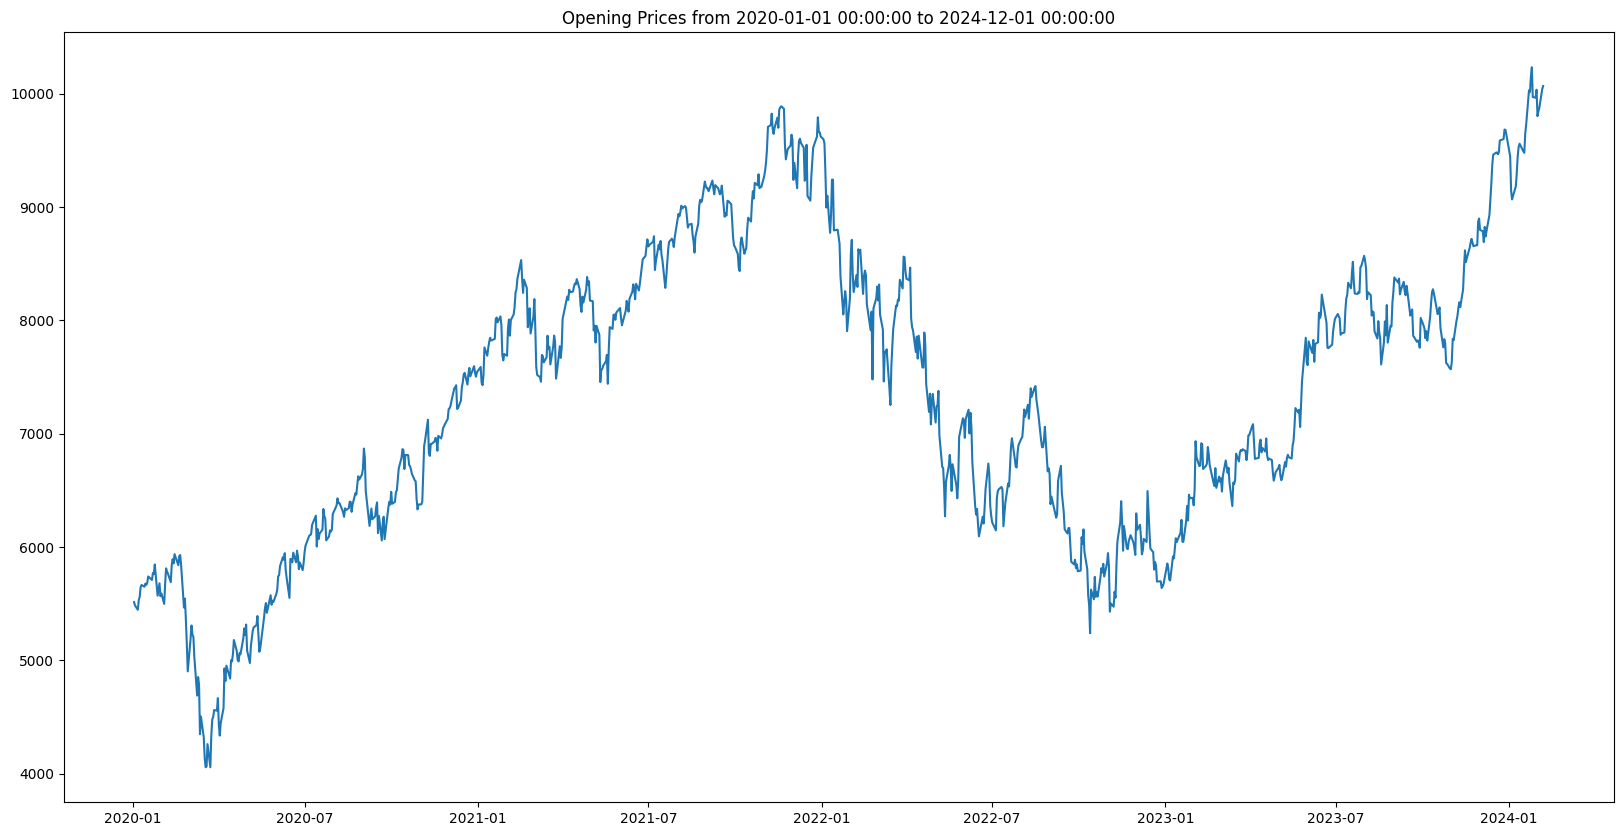

In [172]:
# TODO: weekly price diff (%) parsing from NDXT (NASDAQ 100 Tech companies index); add into data_pd as a new column

# for stock price retrieval
from datetime import datetime, timedelta
import yfinance as yf

# initialize parameters 
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 12, 1)

# get the data 
stock_data = yf.download('^NDXT', start = start_date,
                   end = end_date)

stock_data.to_csv('stock_data.csv', index = True, encoding='utf-8') # False: not include index

# display 
plt.figure(figsize = (20,10))
plt.title('Opening Prices from {} to {}'.format(start_date,
                                                end_date))
plt.plot(stock_data['Open'])
plt.show()

In [173]:
def date_to_index(stock_data, date):
    date_col_stock_data = stock_data.index.to_pydatetime()
    for i in range(len(date_col_stock_data)):
        if date_col_stock_data[i] == date:
            return i
    return -1

def get_closest_available_date(stock_data, date):
    date_col_stock_data = stock_data.index.to_pydatetime()
    # date_col_stock_data = stock_data.reset_index()['Date']
    while date not in date_col_stock_data:
        date = date - timedelta(days = 1)
    return date
    
"""
@param stock_data: original stock_data df
@param week_end: layoff date
@param period: number of days to look back, defaults to 7

@return % of change in NDXT index price during last week before layoff date 
"""
def weekly_price_diff(stock_data, week_end, period: int = 7):
    # week end date in format datetime(YYYY,MM,DD)

    if (week_end < datetime(2020, 1, 15)):
        return 0
    date_col_stock_data = stock_data.reset_index() # add DATE as column
    date_end_closest = get_closest_available_date(stock_data, week_end)
    date_start_closest = get_closest_available_date(stock_data, week_end - timedelta(days = period))
    
    price_end = stock_data['Open'][date_end_closest]
    price_start = stock_data['Open'][date_start_closest]
    price_diff = (price_end - price_start) / price_start * 100
    
    return price_diff # in PERCENTAGE
        
# ! USAGE EXAMPLE
price_diff = weekly_price_diff(stock_data, datetime(2022, 4, 11))
price_diff = round(price_diff, 2)
print(f"Diff between 11 APR 2022 and week before: {price_diff}%")

Diff between 11 APR 2022 and week before: -7.59%


In [174]:
# TODO: ADD RETRIEVED STOCK CHANGE TO DATA_PD

week_price_diff_df = pd.DataFrame(index = stock_data.index, columns = ['price_diff'])
for date in week_price_diff_df.index:
    week_price_diff_df.loc[date, 'price_diff'] = weekly_price_diff(stock_data, date)

stock_data['price_diff'] = week_price_diff_df['price_diff']
stock_data.to_csv('stock_data.csv', index = True, encoding='utf-8')
stock_data

,Open,High,Low,Close,Adj Close,Volume,price_diff
Date,,,,,,,
2020-01-02,5515.020020,5577.549805,5513.319824,5577.229980,5577.229980,284700,0
2020-01-03,5484.939941,5541.020020,5481.959961,5512.149902,5512.149902,260400,0
2020-01-06,5446.620117,5501.520020,5441.009766,5500.129883,5500.129883,241100,0
2020-01-07,5532.540039,5573.660156,5511.180176,5558.129883,5558.129883,297200,0
2020-01-08,5560.810059,5622.370117,5551.470215,5595.439941,5595.439941,279300,0
...,...,...,...,...,...,...,...
2024-01-31,9801.809570,9950.589844,9758.070312,9797.679688,9797.679688,599900,-3.417605
2024-02-01,9845.230469,9910.080078,9782.089844,9888.860352,9888.860352,0,-3.784701
2024-02-02,9876.650391,10044.389648,9860.110352,10021.719727,10021.719727,0,-0.932627


In [175]:
def str_to_datetime(dt_string):
    return datetime.strptime(dt_string, "%Y-%m-%d %H:%M:%S UTC")

layoff_data = pd.read_csv("tech_layoffs.csv")

layoff_data["Date_layoffs"] = layoff_data["Date_layoffs"].apply(lambda x: str_to_datetime(x))
layoff_data.set_index('Date_layoffs', inplace = True)
layoff_data = layoff_data.sort_index()
layoff_data

,#,Company,Location_HQ,Country,Continent,Laid_Off,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
Date_layoffs,,,,,,,,,,,,,,,
2020-03-12,3267,Tamara Mellon,Los Angeles,USA,North America,20,40.000000,50,30,Retail,Series C,$90,2020,34.05223,-118.24368
2020-03-13,3266,Panda Squad,San Francisco Bay Area,USA,North America,6,75.000000,8,2,Consumer,Seed,$1,2020,37.77493,-122.41942
2020-03-13,3265,HopSkipDrive,Los Angeles,USA,North America,8,10.000000,80,72,Transportation,Unknown,$45,2020,34.05223,-118.24368
2020-03-16,3262,Inspirato,Denver,USA,North America,130,22.000000,591,461,Travel,Series C,$79,2020,39.73915,-104.98470
2020-03-16,3263,Help.com,Austin,USA,North America,16,100.000000,16,0,Support,Seed,$6,2020,30.26715,-97.74306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-01,3279,Instagram,San Francisco Bay Area,USA,North America,60,13.333333,450,390,Consumer,Acquired,$57,2024,37.45383,-122.18219
2024-11-01,3272,Discord,San Francisco Bay Area,USA,North America,170,17.000000,1000,830,Consumer,Series H,$995,2024,37.77493,-122.41942
2024-11-01,3273,Inmobi,Bengaluru,India,Asia,125,5.000000,2500,2375,Marketing,Unknown,$320,2024,12.97194,77.59369


In [176]:
# TODO: NOW NEED TO ADD ACCORDING STOCK PRICE CHANGE TO LAYOFF_DATA
# layoff_data_with_date_col = layoff_data.reset_index()
